In [30]:
import os
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib.pyplot as plt

def load_tf_events(rel_path):
    data_dir = os.path.join(os.getcwd(), "../../../data/local")
    train_dir = os.path.join(data_dir, rel_path)
    tf_file = next(x for x in list(os.walk(train_dir))[0][2] if x.startswith("events.out.tfevents"))
    tf_file = os.path.join(train_dir, tf_file)    
    
    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'histograms': 1
    }

    print("Loading tf events from", tf_file)
    event_acc = EventAccumulator(tf_file, tf_size_guidance)
    event_acc.Reload()
    
    return event_acc

Loading tf events from /home/eric/.deep-rl-docker/garage_embed/sandbox/embed2learn/notebooks/../../../data/local/ddpg-sawyer-compose/ddpg_sawyer_compose_2018_08_25_19_10_56_0001/events.out.tfevents.1535249469.tars
Loading tf events from /home/eric/.deep-rl-docker/garage_embed/sandbox/embed2learn/notebooks/../../../data/local/ddpg-sawyer-compose/ddpg_sawyer_compose_2018_08_25_19_10_30_0001/events.out.tfevents.1535249442.tars


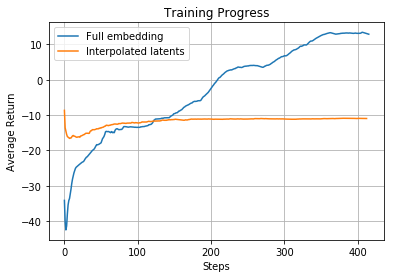

In [31]:
interpolated = load_tf_events("ddpg-sawyer-compose/ddpg_sawyer_compose_2018_08_25_19_10_56_0001")
complete = load_tf_events("ddpg-sawyer-compose/ddpg_sawyer_compose_2018_08_25_19_10_30_0001")

# Show all tags in the log file
#print(event_acc.Tags())

plt.plot(np.array(complete.Scalars('AverageReturn'))[:,2], label="Full embedding")
plt.plot(np.array(interpolated.Scalars('AverageReturn'))[:,2], label="Interpolated latents")

plt.xlabel("Steps")
plt.ylabel("Average Return")
plt.title("Training Progress")
plt.grid()
plt.legend()

This plot shows how the composer performance is improved when the full embedding space is utilized as the action space (blue) compared to the interpolation of the latents (orange) of each of the eight tasks in the Sawyer ReachEnv.